In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('Dataset_Final3.csv')

## Data Discretization

In [3]:
bins = [0, 5, 6, 7, 8, 9, 10]
labels = ['E', 'D', 'C', 'B', 'A', 'S']
data['CGPA'] = pd.cut(data['CGPA'], bins=bins, labels=labels)


## Data Cleaning 

In [4]:
print(len(data))
df_no_duplicates = data.dropna()
print(len(df_no_duplicates))
df_no_duplicates = df_no_duplicates.drop_duplicates(subset=['Name','Roll No'])
print(len(df_no_duplicates))


817
807
755


In [5]:
print(df_no_duplicates.describe())

              Sem         Age      Height      Weight         BMI  \
count  755.000000  755.000000  755.000000  755.000000  755.000000   
mean     4.780132   20.128477  170.945695   73.549669   25.040596   
std      1.631708    1.458778    7.054804   11.612607    2.704230   
min      3.000000   18.000000  100.000000   28.000000   16.050000   
25%      3.000000   19.000000  168.000000   67.000000   23.180000   
50%      5.000000   20.000000  171.000000   72.000000   24.910000   
75%      7.000000   21.000000  174.000000   80.000000   27.160000   
max      7.000000   26.000000  190.000000  120.000000   34.600000   

       Gym/badminton  
count     755.000000  
mean        0.385430  
std         0.487019  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000  


In [6]:
df_no_duplicates['Height'].fillna(round(df_no_duplicates['Height'].mean(),2), inplace=True)
df_no_duplicates['Weight'].fillna(round(df_no_duplicates['Weight'].mean(),2), inplace=True)
df_no_duplicates['CGPA'].fillna(df_no_duplicates['CGPA'].mode(), inplace=True)

<Axes: >

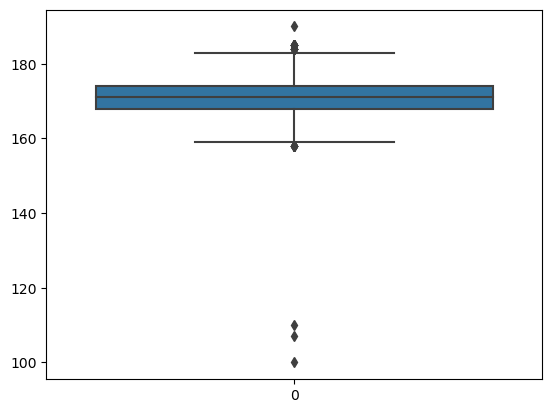

In [7]:
sns.boxplot(df_no_duplicates['Height'])


<Axes: >

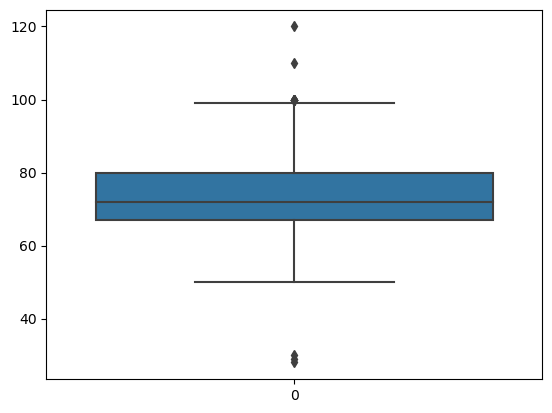

In [8]:
sns.boxplot(df_no_duplicates['Weight'])

<Axes: >

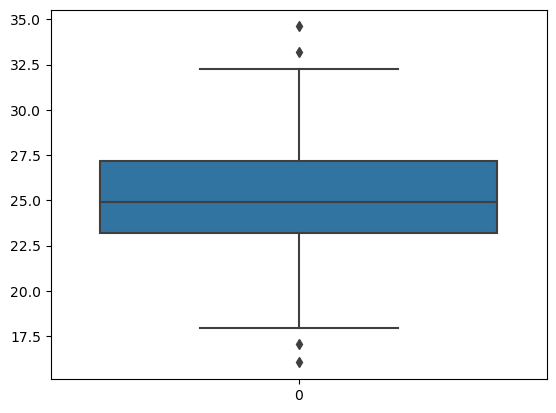

In [9]:
sns.boxplot(df_no_duplicates['BMI'])

In [10]:
df = df_no_duplicates
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1, Q3

(168.0, 174.0)

In [11]:
IQR = Q3 - Q1
IQR

6.0

In [12]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(159.0, 183.0)

In [13]:
height_outliers = df[(df.Height<lower_limit)|(df.Height>upper_limit)]

In [14]:
new_df = df[(df.Height>lower_limit)&(df.Height<upper_limit)]

In [15]:
new_df.describe()

,Sem,Age,Height,Weight,BMI,Gym/badminton
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,4.851852,20.180912,171.039886,73.370370,24.988746,0.380342
std,1.644857,1.450084,4.804433,10.505735,2.687353,0.485817
min,3.000000,18.000000,160.000000,50.000000,16.050000,0.000000
25%,3.000000,19.000000,168.000000,67.000000,23.120000,0.000000
50%,5.000000,20.000000,171.000000,72.000000,24.840000,0.000000
75%,7.000000,21.000000,174.000000,80.000000,27.080000,1.000000
max,7.000000,26.000000,182.000000,100.000000,34.600000,1.000000


<Axes: >

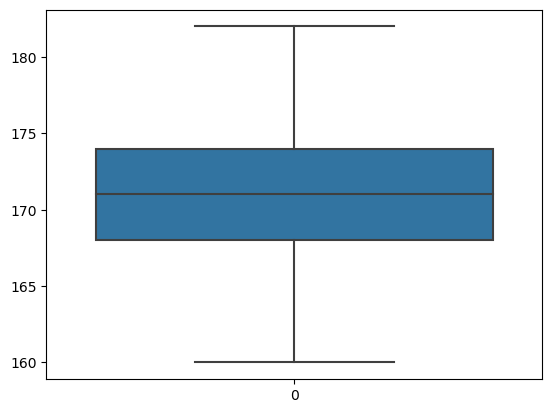

In [16]:
sns.boxplot(new_df['Height'])

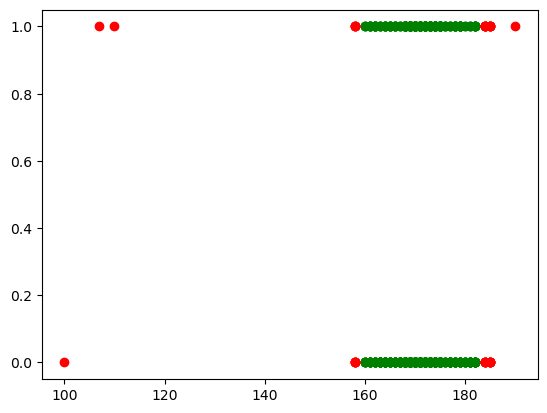

In [17]:
plt.scatter(y=np.array(new_df['Gym/badminton']), x=np.array(new_df['Height']), c='g', marker = 'o')
plt.scatter(y=np.array(height_outliers['Gym/badminton']), x=np.array(height_outliers['Height']), c='r', marker = 'o')
plt.show()

<Axes: >

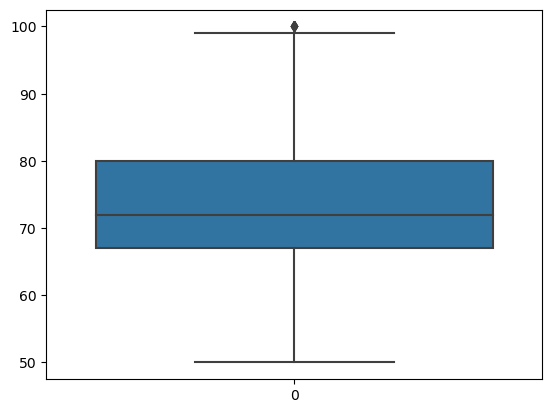

In [18]:
sns.boxplot(new_df['Weight'])

In [19]:
Q1 = new_df.Weight.quantile(0.25)
Q3 = new_df.Weight.quantile(0.75)
Q1, Q3

(67.0, 80.0)

In [20]:
IQR = Q3 - Q1
IQR

13.0

In [21]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(47.5, 99.5)

In [22]:
weight_outliers = new_df[(new_df.Weight<lower_limit)|(new_df.Weight>upper_limit)]
new_df = new_df[(new_df.Weight>lower_limit)&(new_df.Weight<upper_limit)]
weight_outliers

,Name,Roll No,Degree,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton
46,SURAJ KUMAR,ME22B1073,B.Tech,Male,3.0,S,19.0,177.0,100.0,31.92,1.0
62,PRADEEP YADAV,EC22B1056,B.Tech,Male,3.0,S,20.0,179.0,100.0,31.21,1.0
158,SAIKAT PAUL,ME21B1008,B.Tech,Male,5.0,S,20.0,182.0,100.0,30.19,0.0
387,GANESH BANOTU,CS22B2008,B.Tech,Male,3.0,B,18.0,179.0,100.0,31.21,0.0
430,CHEPURI VARSHA,CS20B1170,B.Tech,Female,7.0,S,20.0,170.0,100.0,34.60,0.0
542,AKULA TEJA SWAROOP,EC22B1099,B.Tech,Male,3.0,B,20.0,182.0,100.0,30.19,1.0
782,RUSHABH RAJUKUMAR DARJI,EC21B1088,B.Tech,Male,5.0,D,20.0,176.0,100.0,32.28,0.0


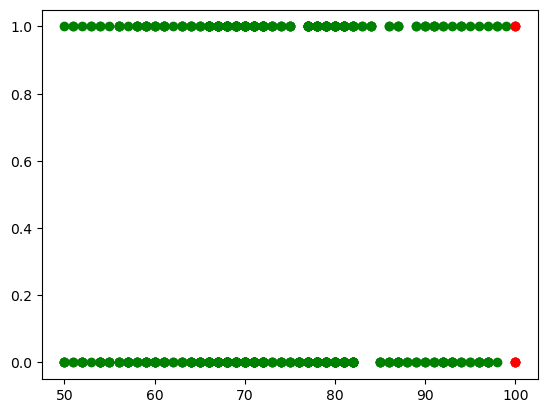

In [23]:
plt.scatter(y=np.array(new_df['Gym/badminton']), x=np.array(new_df['Weight']), c='g', marker = 'o')
plt.scatter(y=np.array(weight_outliers['Gym/badminton']), x=np.array(weight_outliers['Weight']), c='r', marker = 'o')
plt.show()

<Axes: >

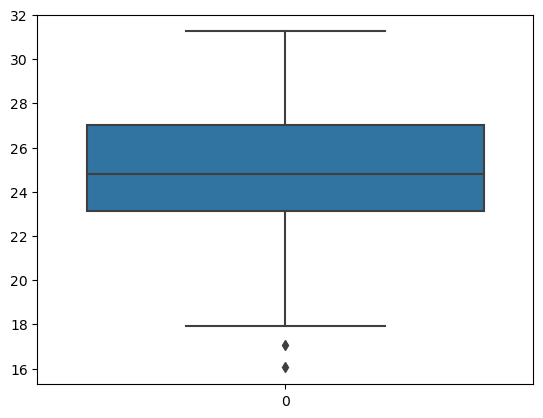

In [24]:
sns.boxplot(new_df['BMI'])

In [25]:
Q1 = new_df.BMI.quantile(0.25)
Q3 = new_df.BMI.quantile(0.75)
Q1, Q3

(23.12, 27.03)

In [26]:
IQR = Q3 - Q1
IQR

3.91

In [27]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(17.255000000000003, 32.895)

In [28]:
bmi_outliers = new_df[(new_df.BMI<lower_limit)|(new_df.BMI>upper_limit)]
new_df = new_df[(new_df.BMI>lower_limit)&(new_df.BMI<upper_limit)]
bmi_outliers

,Name,Roll No,Degree,Gender,Sem,CGPA,Age,Height,Weight,BMI,Gym/badminton
100,DEVARAKONDA KARTHIKEYA,CS21B2049,B.Tech,Male,5.0,A,21.0,180.0,52.0,16.05,0.0
654,VANIPENTA VARSHITH REDDY,EC20B1206,B.Tech,Male,7.0,A,22.0,178.0,54.0,17.08,1.0


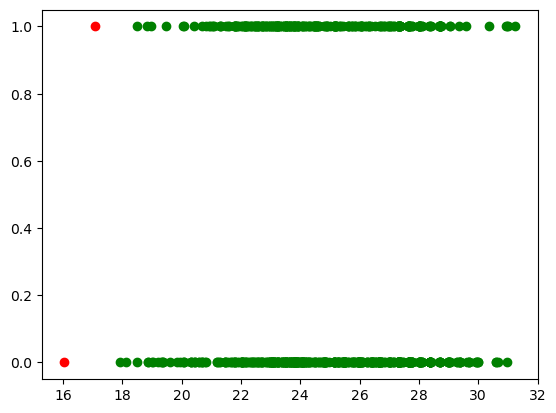

In [30]:
plt.scatter(y=np.array(new_df['Gym/badminton']), x=np.array(new_df['BMI']), c='g', marker = 'o')
plt.scatter(y=np.array(bmi_outliers['Gym/badminton']), x=np.array(bmi_outliers['BMI']), c='r', marker = 'o')
plt.show()